# Customer Churn Analysis

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [93]:
df = pd.read_csv('data.csv')

In [94]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [95]:
df.shape

(5785, 21)

In [96]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [97]:
df['Churn'].value_counts()

0    4258
1    1527
Name: Churn, dtype: int64

In [132]:
df['Churn']=df['Churn'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 21 columns):
customerID          5785 non-null object
gender              5785 non-null object
SeniorCitizen       5785 non-null object
Partner             5785 non-null object
Dependents          5785 non-null object
tenure              5785 non-null int64
PhoneService        5785 non-null object
MultipleLines       5785 non-null object
InternetService     5785 non-null object
OnlineSecurity      5785 non-null object
OnlineBackup        5785 non-null object
DeviceProtection    5785 non-null object
TechSupport         5785 non-null object
StreamingTV         5785 non-null object
StreamingMovies     5785 non-null object
Contract            5785 non-null object
PaperlessBilling    5785 non-null object
PaymentMethod       5785 non-null object
MonthlyCharges      5785 non-null float64
TotalCharges        5785 non-null object
Churn               5785 non-null object
dtypes: float64(1), int64(1), ob

In [133]:
# Replacing all Senior Citizens 0 values with No and 1 with Yes
df['Churn']=df['Churn'].replace('1','Yes')
df['Churn']=df['Churn'].replace('0','No')

In [134]:
df['Churn'].value_counts()

No     4258
Yes    1527
Name: Churn, dtype: int64

In [135]:
df.groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
No,37.470174,61.345996
Yes,17.745907,74.359463


#### Insights : 
-> Customers with lower tenure are more likely to churn

-> Customers who are churning have comparatively higher MonthlyCharges            

# Eploring the various Categorical Columns

In [99]:
df['gender'].value_counts()

Male      2918
Female    2867
Name: gender, dtype: int64

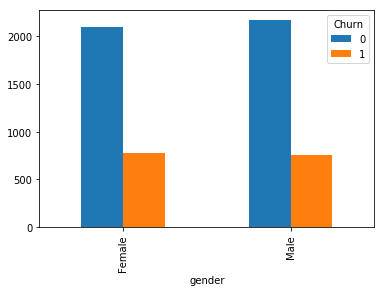

In [100]:
pd.crosstab(df.gender,df.Churn).plot(kind='bar')

##### Gender has almost no effect on churn

In [101]:
df['SeniorCitizen'].value_counts()

0    4848
1     937
Name: SeniorCitizen, dtype: int64

In [102]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 21 columns):
customerID          5785 non-null object
gender              5785 non-null object
SeniorCitizen       5785 non-null object
Partner             5785 non-null object
Dependents          5785 non-null object
tenure              5785 non-null int64
PhoneService        5785 non-null object
MultipleLines       5785 non-null object
InternetService     5785 non-null object
OnlineSecurity      5785 non-null object
OnlineBackup        5785 non-null object
DeviceProtection    5785 non-null object
TechSupport         5785 non-null object
StreamingTV         5785 non-null object
StreamingMovies     5785 non-null object
Contract            5785 non-null object
PaperlessBilling    5785 non-null object
PaymentMethod       5785 non-null object
MonthlyCharges      5785 non-null float64
TotalCharges        5785 non-null object
Churn               5785 non-null int64
dtypes: float64(1), int64(2), obj

In [103]:
# Replacing all Senior Citizens 0 values with No and 1 with Yes
df['SeniorCitizen']=df['SeniorCitizen'].replace('1','Yes')
df['SeniorCitizen']=df['SeniorCitizen'].replace('0','No')

In [104]:
df['SeniorCitizen'].value_counts()

No     4848
Yes     937
Name: SeniorCitizen, dtype: int64

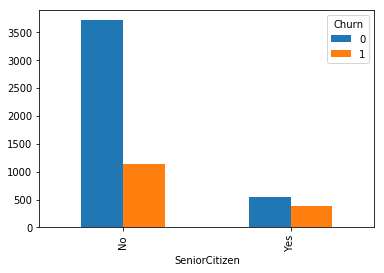

In [105]:
pd.crosstab(df.SeniorCitizen,df.Churn).plot(kind='bar')

##### The ratio of Senior Citizens churning is more

In [106]:
df['Partner'].value_counts()

No     2984
Yes    2801
Name: Partner, dtype: int64

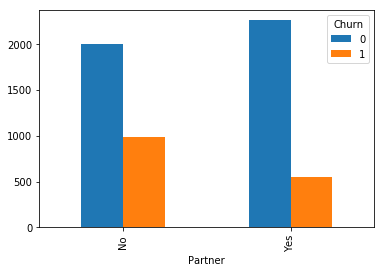

In [107]:
pd.crosstab(df.Partner,df.Churn).plot(kind='bar')

##### Customers having no Partners are slightly more likely to churn

In [108]:
df['Dependents'].value_counts()

No     4071
Yes    1714
Name: Dependents, dtype: int64

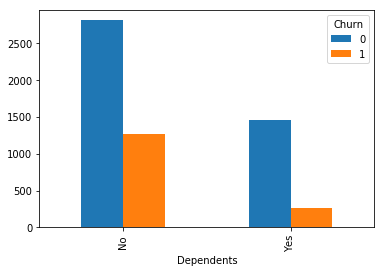

In [109]:
pd.crosstab(df.Dependents,df.Churn).plot(kind='bar')

#####  Dependents are slightly more likely to Churn

In [110]:
df['tenure'].describe()

count    5785.000000
mean       32.263786
std        24.584428
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [111]:
df['PhoneService'].value_counts()

Yes    5253
No      532
Name: PhoneService, dtype: int64

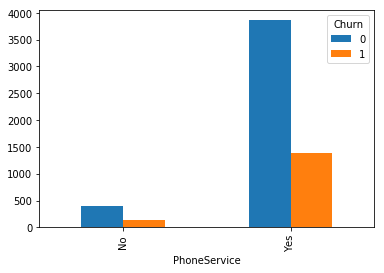

In [112]:
pd.crosstab(df.PhoneService,df.Churn).plot(kind='bar')

##### Insight ???

In [114]:
df['MultipleLines'].value_counts()

No                  2804
Yes                 2449
No phone service     532
Name: MultipleLines, dtype: int64

In [115]:
# Replacing all MultipleLines 'No phone service' values with No.
df['MultipleLines']=df['MultipleLines'].replace('No phone service','No')

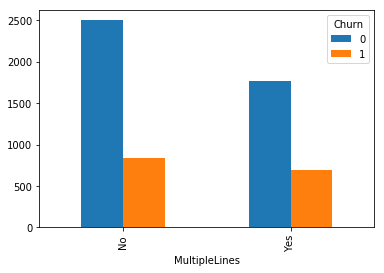

In [116]:
pd.crosstab(df.MultipleLines,df.Churn).plot(kind='bar')

##### Customers with multiple lines churn slightly more than Cutomers without multiple lines

In [117]:
df['InternetService'].value_counts()

Fiber optic    2543
DSL            1974
No             1268
Name: InternetService, dtype: int64

In [118]:
df['InternetService']=df['InternetService'].replace('DSL','Yes')
df['InternetService']=df['InternetService'].replace('Fiber optic','Yes')

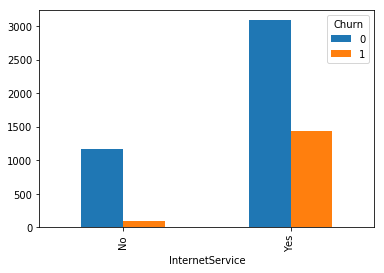

In [119]:
pd.crosstab(df.InternetService,df.Churn).plot(kind='bar')

##### The ratio of churned customers is high for Customers having Internet Service activated

In [120]:
df['OnlineSecurity'].value_counts()

No                     2855
Yes                    1662
No internet service    1268
Name: OnlineSecurity, dtype: int64

In [121]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service','No')

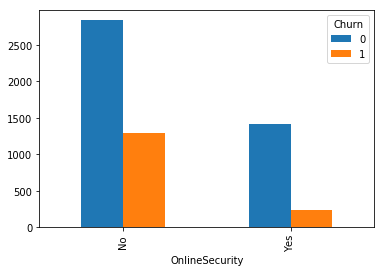

In [122]:
pd.crosstab(df.OnlineSecurity,df.Churn).plot(kind='bar')

##### Customers without Online Security are less likely to churn

In [123]:
df['OnlineBackup'].value_counts()

No                     2533
Yes                    1984
No internet service    1268
Name: OnlineBackup, dtype: int64

In [124]:
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service','No')

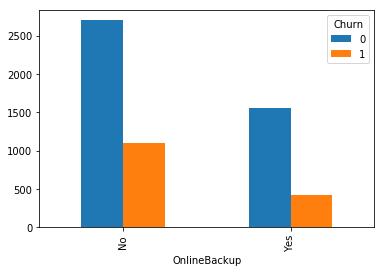

In [125]:
pd.crosstab(df.OnlineBackup,df.Churn).plot(kind='bar')

##### Not much affect on Customer Churn

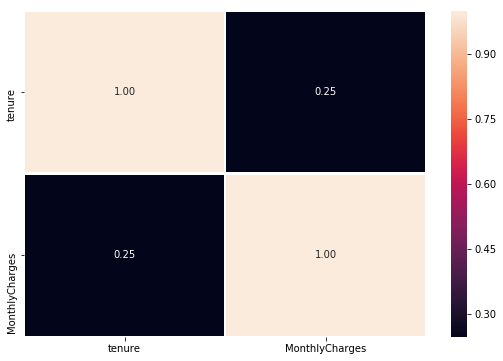

In [136]:
corr=df.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

#### There is no Correlation between Monthly Charges and Tenure